# Algoritmo de Dijkstra

Este algoritmo **soluciona o problema do caminho mais curto num grafo** com arestas de peso não negativo.

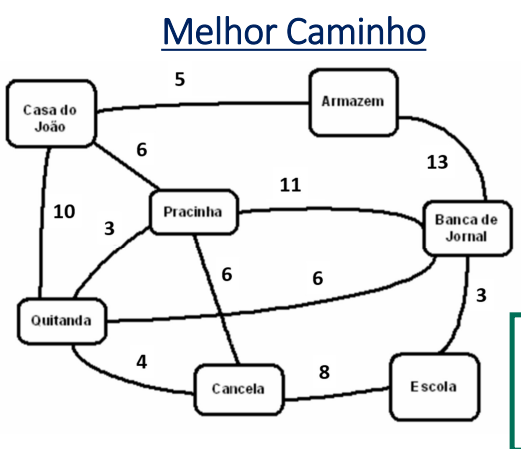

O funcionamento do algoritmo é explorar todas as arrestar dado um ponto inicial e caminhando pelo caminho que possui um custo inferior aos demais.

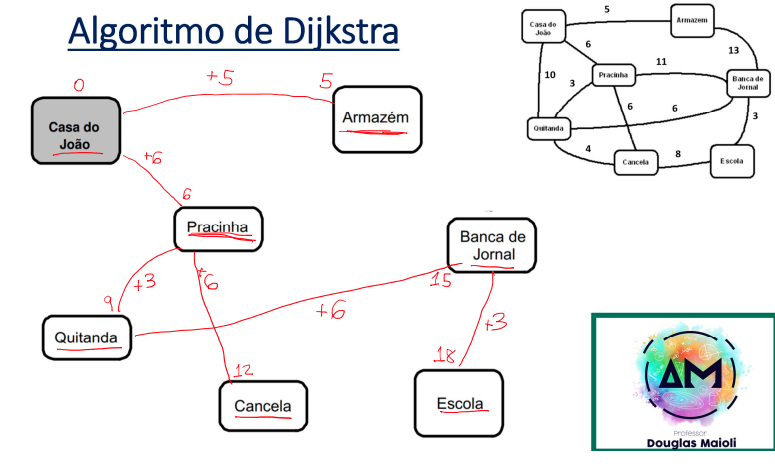

Veja nesta imagem temos que no ponto inicial exploramos 3 caminhos e obtemos qual o vizinho partindo do ponto inicial me dar um custo menor. Logo o Armazém neste exemplo é o ponto escolhido. 

### Pensando como representar e resolver o problema 

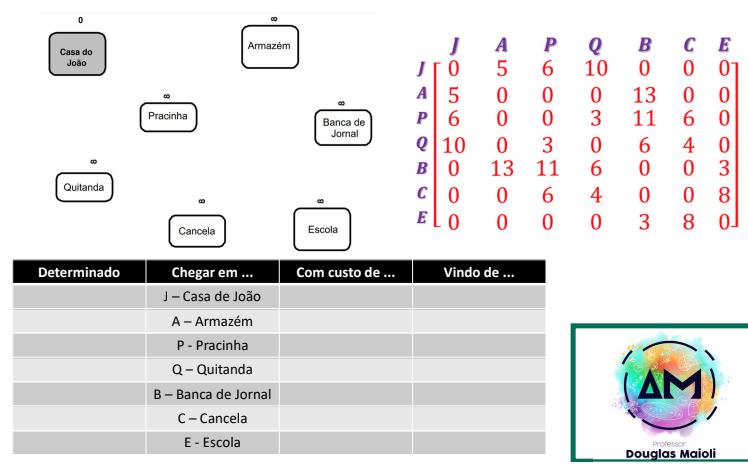


In [52]:
import numpy as np
import networkx as nx # type: ignore
from pandas import read_excel  # type: ignore
from numpy import isnan, where
import matplotlib.pyplot as plt # type: ignore
from heapq import heappop, heappush
from utils import end_time_fun, start_time_fun

In [53]:
def graph_show(matriz_adjancente, caminho=[]):
    matriz = np.array(matriz_adjancente)

    G = nx.from_numpy_array(matriz)

    pos = nx.spring_layout(G, seed=42)

    # Obter os pesos das arestas
    edge_labels = {
        (i, j): matriz[i][j]
        for i, row in enumerate(matriz)
        for j, weight in enumerate(row)
        if weight > 0
    }

    nx.draw_networkx_edges(
        G, pos, edgelist=G.edges(), edge_color="gray", width=1, alpha=0.5
    )

    if len(caminho) > 0:
        path_edges = [(caminho[i], caminho[i + 1]) for i in range(len(caminho) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

    # Desenhar o grafo com os nós em primeiro plano
    nx.draw(G, pos, with_labels=True, font_weight="bold")

    for (i, j), label in edge_labels.items():
        x = (pos[i][0] + pos[j][0]) / 2 
        y = (pos[i][1] + pos[j][1]) / 2
        
        plt.text(
            x,
            y,
            str(label),
            color="black",
            ha="center",
            va="center",
            backgroundcolor="white",
            bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.1"),
            fontsize=8,
        )

    return plt.show()

In [54]:
# Lendo o excel com os dados de pesos entre as cidades
excel = read_excel("grafo.ods", engine="odf")
data_numpy = where(isnan(excel.to_numpy()), 0, excel.to_numpy())

matriz_adjancente: list[list[int]] = []

for row_index, row_data in enumerate(data_numpy.tolist()):
    matriz_adjancente.append([])
    for item in row_data:
        matriz_adjancente[row_index].append(int(item) if item != 0 else int(item))

In [55]:
def get_caminho(caminho, cidade_atual: int, cidade_anterior):
    atual = cidade_anterior[1]
    cidades = [cidade_atual, cidade_anterior[1]]

    for _ in range(cidade_anterior[1]):
        if atual != 0:
            cidades.append(caminho[atual][1])
            atual = caminho[atual][1]
    
    return cidades

# Algoritmo de Dijkstra
def dijkstra(grafo: list[list[int]], origem: int):
    custo_acumulado = [[-1, 0] for _ in range(len(grafo))]
    custo_acumulado[origem] = [0, origem]
    heap = []

    heappush(heap, [0, origem])

    while len(heap) > 0:
        dist, v = heappop(heap)
        
        for i in range(len(grafo)):
            if grafo[v][i] != 0:
                if (
                    custo_acumulado[i][0] == -1
                    or custo_acumulado[i][0] > dist + grafo[v][i]
                ):
                    custo_acumulado[i] = [dist + grafo[v][i], v]
                    heappush(heap, [dist + grafo[v][i], i])

    return custo_acumulado

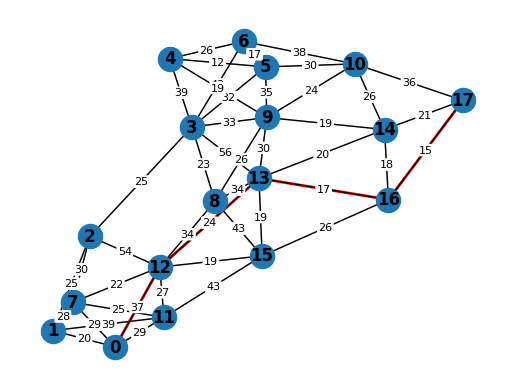

--- 0.5011758804321289 seconds ---


In [56]:
start_time = start_time_fun()

result = dijkstra(matriz_adjancente, 0)

# for i, value in enumerate(result):
#     print(f"Cidade: {i} - Custo: {value[0]} - Vem de {get_caminho(result, i, value)}")

caminho = get_caminho(result, 17, result[-1])
# result
graph_show(matriz_adjancente, caminho)

print("--- %s seconds ---" % (end_time_fun(start_time)))

## Algoritmo para obter a Árvores Geradoras Mínimas

Árvores Geradoras Mínimas: É o caminho que me dar o menor custo possivel entre todas as vertex. Mas ele não garanti que vai passar em uma cidade pelo ou menos uma vez não. Então não se aplicar pra o problema do caxeiro viajante. Pois ele se preocupa em obter o menor custo ao interligar todas as vertex.

Exemplo: Digamos que quero implatar a fibra ótica entre várias salas da faculdade e desejo obter a menor quantidade de fios possiveis para deixar as salas com internet. 

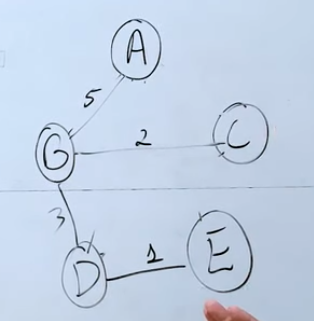

Um ponto importante é que esse algoritmo de prim só vai funcionar para grafos direcionado. Ou seja para grafo que posso ir de A > B e de B < A.

In [57]:
def prim(grafo, origem):
    # Inicializa todas as chaves com infinito
    key = [float("inf")] * len(grafo)
     # Inicializa todos os pais como nulos
    parent = [None] * len(grafo) 
    # Chave do vértice de origem é 0
    key[origem] = 0
    heap = [(0, origem)]

    while len(heap) != 0:
        current_key, vertex_atual = heappop(heap)

        for vizinho, peso in enumerate(grafo[vertex_atual]):
            if 0 != peso and peso < key[vizinho]:
                key[vizinho] = peso
                parent[vizinho] = vertex_atual
                heappush(heap, (peso, vizinho))

    # [filho, pai]
    arvore_genadora_minima = [[0, 0]]
    for i in range(len(grafo)):
        if parent[i] is not None:
            arvore_genadora_minima.append([
                # grafo[i][parent[i]], 
                i, parent[i]])

    return arvore_genadora_minima

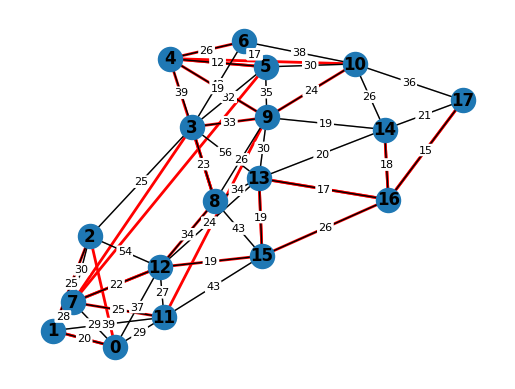

--- 0.6697177886962891 seconds ---


In [58]:
start_time = start_time_fun()

result = prim(matriz_adjancente, 0)

caminho = []
for i in result:
    caminho.append(i[0])
    caminho.append(i[1])

# print(caminho)
# print(result[1:])

graph_show(matriz_adjancente, caminho)

print("--- %s seconds ---" % (end_time_fun(start_time)))

# Algoritmo de Kruskal

Este algoritmo é outro para gerar uma AGM pra um dado grafo. A idea do algoritmo é encontrar o minimo custo possivel. Também é usado em soluções de otimizações de menor caminho porem não garanti que não passe por uma vertex somente uma fez não. Logo não se aplicar a resolução do caxeiro viajante.

Aqui o exemplo do funcionamento do algoritmo.

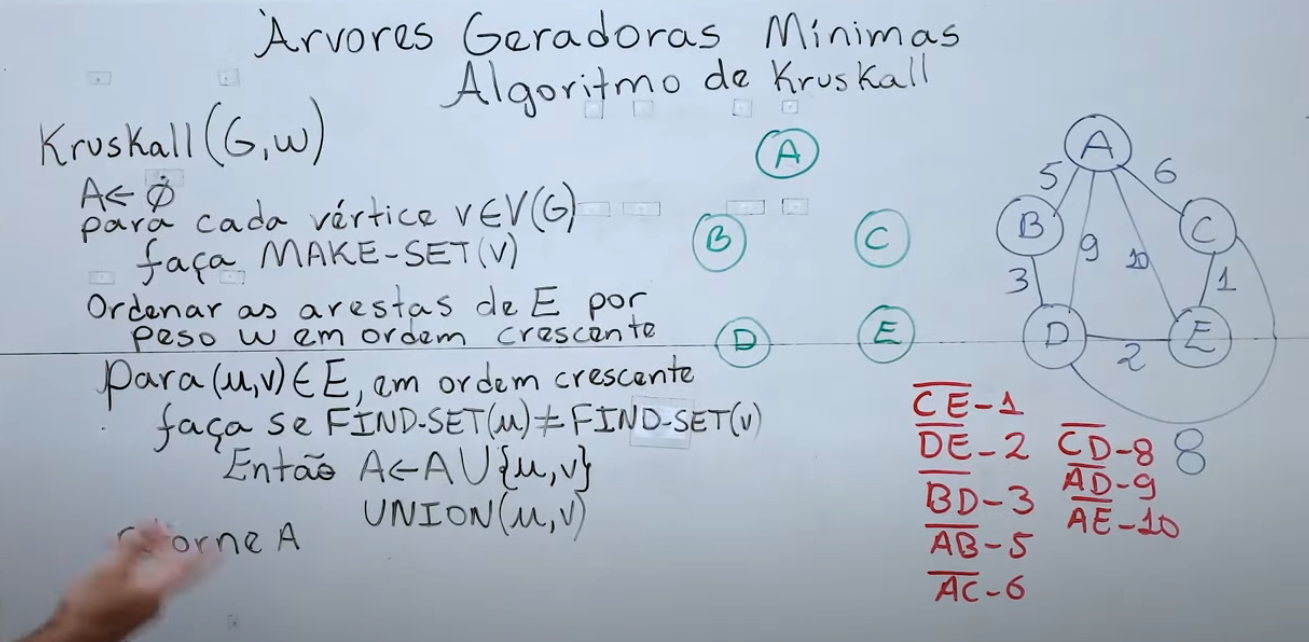

Este algoritmo usa operações de conjuntos para encontrar a AGM de um grafo.

In [59]:
class ConjuntoUtils:
    def __init__(self):
        self.parent = {}
        self.rank = {}

    def make_set(self, vertex):
        self.parent[vertex] = vertex
        self.rank[vertex] = 0

    def find_set(self, vertex):
        if vertex != self.parent[vertex]:
            self.parent[vertex] = self.find_set(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        raiz1 = self.find_set(vertex1)
        raiz2 = self.find_set(vertex2)

        if raiz1 != raiz2:
            if self.rank[raiz1] > self.rank[raiz2]:
                self.parent[raiz2] = raiz1
            else:
                self.parent[raiz1] = raiz2
                if self.rank[raiz1] == self.rank[raiz2]:
                    self.rank[raiz2] += 1

In [60]:
def kruskal(graph):
    edges = []
    
    for i in range(len(graph)):
        for j in range(i + 1, len(graph[i])):
            weight = graph[i][j]
            if weight != 0:
                edges.append((i, j, weight))

    # Ordenando as vertex pelo que tem o peso menor
    edges.sort(key=lambda edge: edge[2])
    
    disjoint_set = ConjuntoUtils()

    # {filho: pai}
    cidades_dict = {}

    for edge in edges:
        vertex1, vertex2, weight = edge
        
        if vertex1 not in disjoint_set.parent:
            disjoint_set.make_set(vertex1)
        if vertex2 not in disjoint_set.parent:
            disjoint_set.make_set(vertex2)

        raiz1 = disjoint_set.find_set(vertex1)
        raiz2 = disjoint_set.find_set(vertex2)
        
        if raiz1 != raiz2:
            disjoint_set.union(vertex2, vertex1)
            cidades_dict[vertex1] = raiz2

    cidades = []
    for key, value in cidades_dict.items():
        cidades.extend([key, value])

    return disjoint_set.parent, cidades

{4: 0, 5: 0, 16: 0, 17: 0, 6: 0, 13: 0, 14: 0, 9: 0, 12: 0, 15: 0, 0: 0, 1: 0, 7: 0, 3: 0, 8: 0, 10: 0, 2: 0, 11: 0}


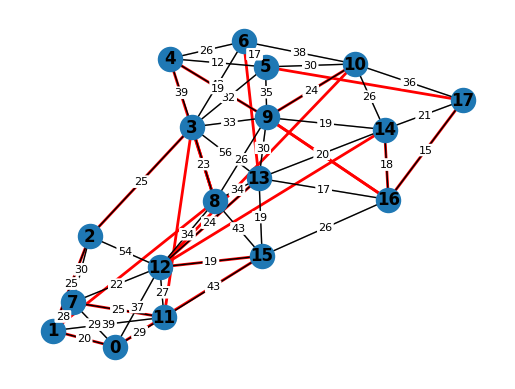

--- 0.8422267436981201 seconds ---


In [61]:
start_time = start_time_fun()

parents, cidades = kruskal(matriz_adjancente)

print(parents)

graph_show(matriz_adjancente, cidades)

print("--- %s seconds ---" % (end_time_fun(start_time)))

### Referências

**Dijkstra** https://www.youtube.com/watch?v=3vBx8GqlVT4&t=2123s

**Prim** https://www.youtube.com/watch?v=vXdtCJmkoEU&t=2s

**Kruskal** https://www.youtube.com/watch?v=B05RatRXHx4